# Выявление потенциально успешных продуктов для интернет-магазина компьютерных игр на будущий год

Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.  
Нужно выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Располагаем данными до 2016 года, соответственно, планируем кампанию на 2017-й. 

**Описание данных:**  
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Порядок работы:  

1. обзор данных;
2. предобработка данных;
3. исследовательский анализ данных;
4. статистический анализ данных.

## Изучение общей информации  


In [114]:
#импортируем все необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [115]:
#считаем csv-файл games.csv в датафрейм data
data = pd.read_csv('/datasets/games.csv') 

In [116]:
#выведем на экран первые 10 строк
data.head(10) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [117]:
# посмотрим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [118]:
#посмотрим на характерные значения
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:**  
В датафрейме 16715 строк  
Судя по данным describe в столбце Year_of_Release представлены данные с 1980 по 2016 год  
Присутствуют пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating  
Некорректные типы данных в столбцах Year_of_Release, User_Score  
В названиях всех столбцов есть прописные буквы  

## Предобработка данных

В предобработке данных необходимо выполнить следующие действия:  
1. привести названия столбцов к нижнему регистру;
2. преобразовать данные в нужные типы;
3. обработать пропуски;
4. добавить столбец с суммарными продажами во всех регионах.

### Корректировка названий столбцов

In [119]:
#приведем все названия к нижнему регистру
data.columns = data.columns.str.lower()

In [120]:
#проверим, что изменения произошли
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

In [121]:
# посмотрим, в каких столбцах сколько пропусков
data.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [122]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [123]:
import missingno as msno

<AxesSubplot:>

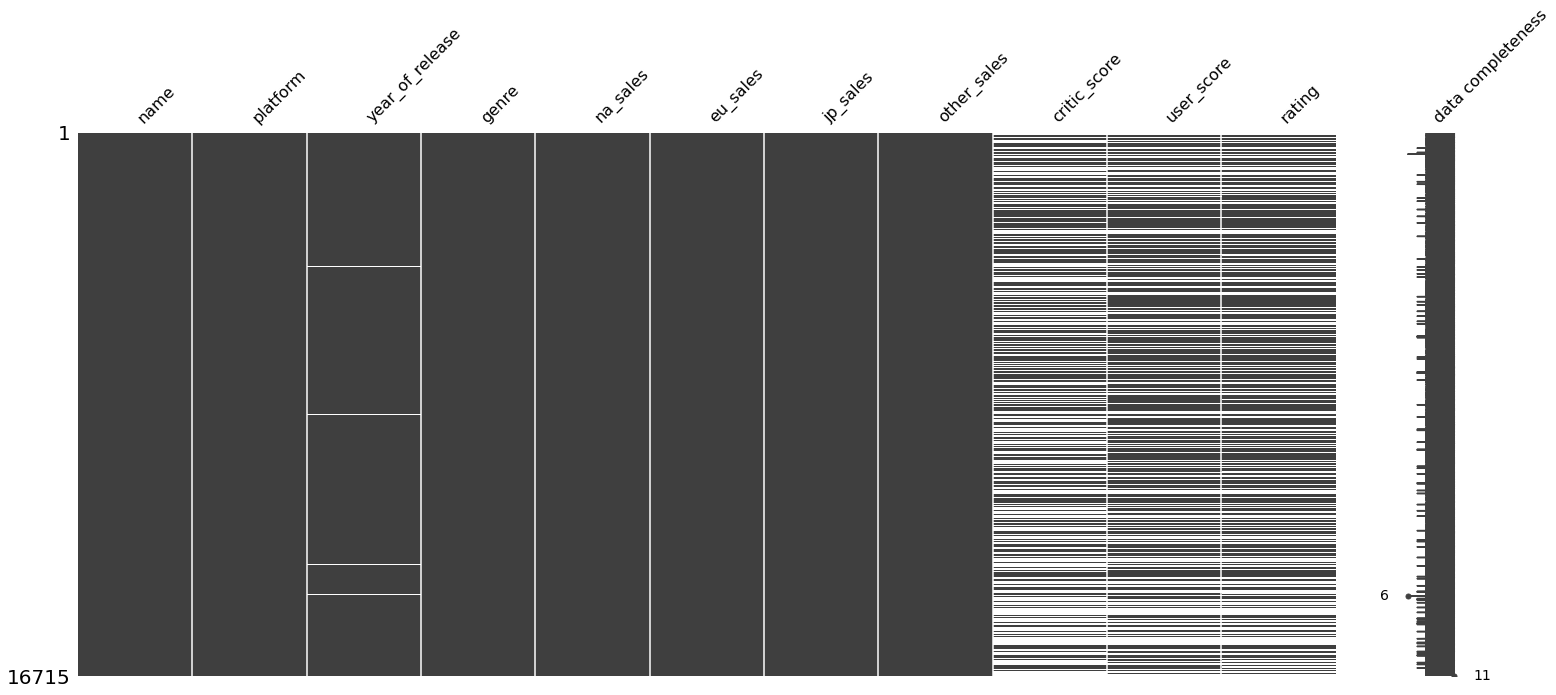

In [124]:
msno.matrix(data, labels=True)

При помощи визуализации пропущенных значений, получается наглядно, в какой степени отсутствуют значения в тех или иных столбцах  
Видим незначительные пропуски в столбце year_of_release, а также сильную нехватку данных в user_score, rating, и больше всего в critic_score

#### Пропуски в столбце name

In [125]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце name всего два пропуска, также в этих строках отсутствуют значения еще в 4х столбцах, плюс это данные за 1993 год, скорее всего при дальнейшем анализе мы будем рассматривать более поздний период, поэтому эти строки можно удалить

In [126]:
data.shape[0]

16715

In [127]:
data = data.dropna(subset = ['name'])

In [128]:
#проверим, что удалилось всего 2 строки
data.shape[0]

16713

#### Пропуски в столбце year_of_release

In [129]:
data[data['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 пропущенных значений = менее 1,5 % всего датафрейма, поскольку мы не можем заполнить пропуски в этом столбце какими-то логичными значениями, удалим данные строки

In [130]:
data = data.dropna(subset = ['year_of_release'])

In [131]:
data.shape[0]

16444

In [132]:
#еще раз посмотрим, в каких столбцах остались пропуски
data.isna().sum() 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

С удалением пропусков в столбце name ушли и пропуски в столбце genre  
Посмотрим на данные в столбцах critic_score, user_score и rating

#### Пропуски в столбце critic_score

In [133]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [134]:
data.pivot_table(index=['year_of_release'], values=['critic_score'], aggfunc='count')

,critic_score
year_of_release,
1980.0,0
1981.0,0
1982.0,0
1983.0,0
1984.0,0
1985.0,1
1986.0,0
1987.0,0
1988.0,1


Пропущенные значения могут означать, что игру никто не оценивал, или данные потерялись при переносе в таблицу  
У игр до 1996 почти нет оценок, педположим, что до того момента было не так много игр, доступных общественности, поэтому не было надобности в их оценивании  
Во всем столбце более половины значений пропущено, эти пропуски выглядят скорее техническими, невозможно точно определить причину их появления и заполнить какими-либо логичными значениями, плюс пропущенные значения - NaN, что позволяет проводить с данными в этом столбце операции, поэтому оставим пропуски в столбце critic_score без изменений

#### Пропуски в столбце user_score

In [135]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Пропущенные значения в этом столбце, как и в предыдущем могут означать, что игру никто не оценивал, или данные потерялись при переносе в таблицу  
Также некорректно было бы заполнить пропуски средним, медианой или даже нулем, т.к. отсутствие рейтинга не равно нулевой оценке  
Значения NaN можно оставить, однако присутствуют также значения tbd, посмотрим, что это за значения

In [136]:
#посчитаем количество значений tbd
len(data[data['user_score'] == 'tbd'])

2376

In [137]:
data[data['user_score'] == 'tbd'].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


In [138]:
data[data['user_score'] == 'tbd'].tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16568,Luxor: Pharaoh's Challenge,DS,2007.0,Puzzle,0.00,0.01,0.00,0.0,NaN,tbd,E
16574,Smart Boy's Winter Wonderland,DS,2008.0,Misc,0.01,0.00,0.00,0.0,NaN,tbd,E
16577,Space Raiders,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,40.0,tbd,T
16593,Winx Club: Saving Alfea,3DS,2014.0,Action,0.00,0.01,0.00,0.0,NaN,tbd,E
16599,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,0.00,0.01,0.00,0.0,NaN,tbd,E
16615,Balloon Pop 2,3DS,2012.0,Puzzle,0.01,0.00,0.00,0.0,NaN,tbd,E
16626,The Ultimate Battle of the Sexes,Wii,2010.0,Misc,0.01,0.00,0.00,0.0,NaN,tbd,T
16633,SBK Superbike World Championship,PSP,2008.0,Racing,0.01,0.00,0.00,0.0,NaN,tbd,E10+
16638,Tour de France 2014,PS3,2014.0,Sports,0.00,0.01,0.00,0.0,NaN,tbd,E
16647,Metal Gear Solid HD Edition,X360,2011.0,Action,0.00,0.00,0.01,0.0,NaN,tbd,M


2376 значений, не прослеживается зависимость от игры, года, жанра или рейтинга ESRB.  
TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.  
Соответственно, это игры, рейтинг по которым еще не сформировался, а значит они приравниваются к пропускам и их можно заменить на NaN.  
Поскольку tbd - строковое значение, столбец user_score имеет строковый тип, поэтому переведем строки, которые записаны в виде числа, в числовой тип с помощью метода to_numeric() + допольнительный параметр errors переведет все остальные значения, которые не являются числами в NaN.

In [139]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [140]:
#проверим, что количество пропусков увеличилось ровно на количество бывших значений tbd
data['user_score'].isna().sum()

8981

In [141]:
#проверим, что ненужные значения ушли
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

#### Пропуски в столбце rating

In [142]:
data['rating'].isna().sum()

6676

In [143]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Все значения соответствуют действительности, т.е. такие обозначения в рейтинге ESRB существуют, можем предположить, что пропущенным значениям этот рейтинг не присвоен или отнести это к технической ошибке, в любом случае рейтинг - неизвестен, поэтому заменим пропуски на unknown

In [144]:
data['rating'] = data['rating'].fillna(value='unknown')

In [145]:
#проверим, что все пропуски заполнены
data['rating'].isna().sum()

0

In [146]:
data.reset_index(drop=True, inplace=True) #восстановим корректную нумерацию индексов

### Преобразование данных в нужный тип

In [147]:
#еще раз посмотрим на типы данных в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


В предыдущем пункты мы уже преобразовали тип данных столбца user_score в float, осталось разобраться с годом выпуска  

In [148]:
#выведем список уникальных значений столбца year_of_release
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

Год выпуска не может быть вещественным числом, дробных значений здесь и нет, поэтому преобразуем значения в этом столбце в целое число

In [149]:
data['year_of_release'] = data['year_of_release'].astype('int32')

In [150]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983], dtype=int32)

In [151]:
#проверим, что все типы данных теперь корректны
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


### Расчет суммарных продаж во всех регионах

Для расчета суммарных продаж во всех регионах нужно сложить значения в столбцах NA_sales EU_sales JP_sales Other_sales и записать получившуюся сумму в новый столбец

In [152]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [153]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [154]:
#посчитаем количество игр в каждом году
data.groupby('year_of_release')['name'].agg('count')

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

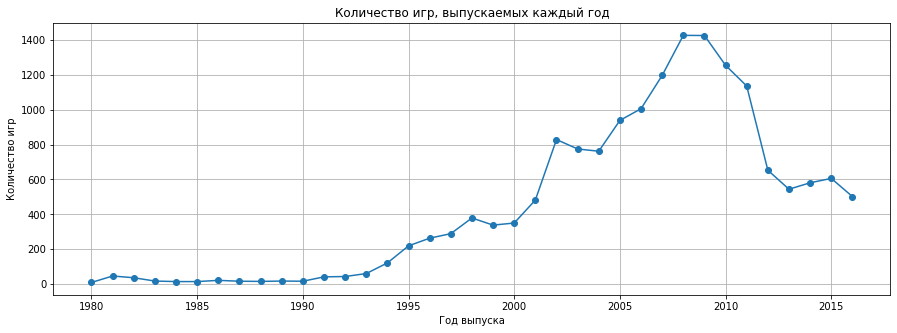

In [155]:
(data
    .groupby('year_of_release')['name'].agg('count')
    .plot(grid=True, style='o-', figsize=(15, 5))
)
plt.title('Количество игр, выпускаемых каждый год')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Рост практически не наблюдается до 1994 года, с 1995 идет уверенный подъем, возможно, это связано с тем, что Sony выпускает Playstation и другие производители также начинают развивать свои платформы  
Самый пик приходится на 2007 год, как раз +\- в конце 2006 друг за другом выходят Xbox 360, Wii, PlayStation 3, для каждой из консолей наверняка выпускали эксклюзивные игры, промо и т.д. для того, чтобы повысить спрос на приставки  
Спад количества игр начиная с 2010 года может быть обусловлен тем, что качество игр стало переходить на другой уровень, вместо нескольких простых игр стали выпускать меньше, но их разработкой занимаются гораздо дольше, улучшают графику, разнообразят геймплей и т.д.
Нет смысла рассматривать данные за все периоды, т.к. какие-то платформы уже сняли с производства, какие-то просто устарели и есть более новая версия (например, PS - PS4), поэтому нужно узнать средний жизненный цикл платформы и исходя из этого показателя выбрать актуальный период
Сейчас можно предположить, что рассматривать стоит от 5 до 10 лет, не больше

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [156]:
#соберем сводную таблицу со значениями суммарных продаж по платформам и отсортируем по убыванию
(data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Рассмотрим жизненный цикл платформ с наибольшими суммарными продажами

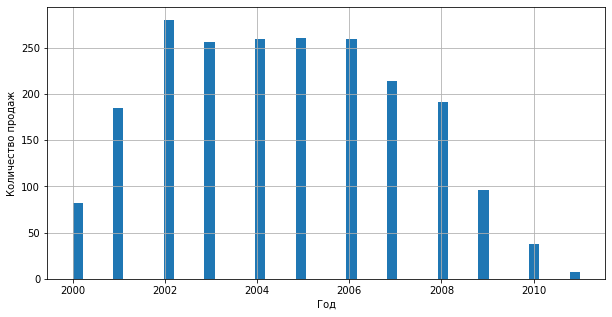

In [157]:
data[data['platform'] == 'PS2']['year_of_release'].hist(bins = 50, figsize=(10,5));
plt.ylabel('Количество продаж');
plt.xlabel('Год');

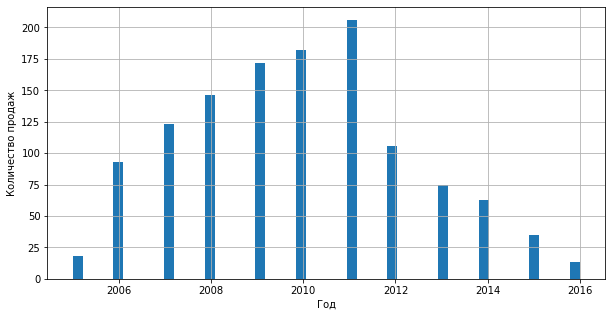

In [158]:
data[data['platform'] == 'X360']['year_of_release'].hist(bins = 50, figsize=(10,5));
plt.ylabel('Количество продаж');
plt.xlabel('Год');

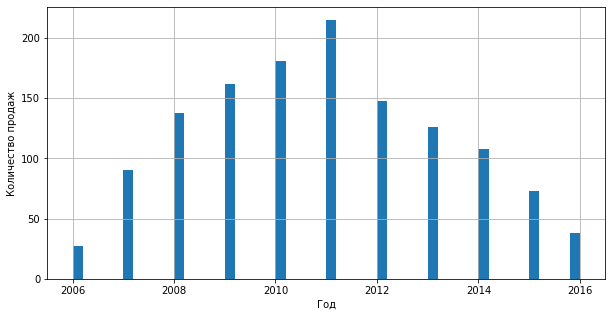

In [159]:
data[data['platform'] == 'PS3']['year_of_release'].hist(bins = 50, figsize=(10,5));
plt.ylabel('Количество продаж');
plt.xlabel('Год');

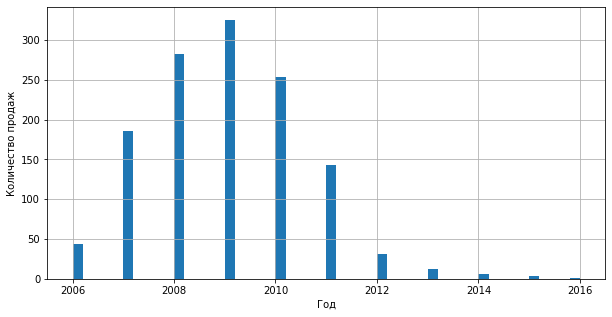

In [160]:
data[data['platform'] == 'Wii']['year_of_release'].hist(bins = 50, figsize=(10,5));
plt.ylabel('Количество продаж');
plt.xlabel('Год');

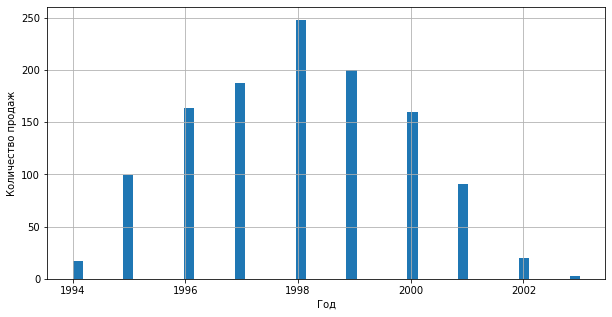

In [161]:
data[data['platform'] == 'PS']['year_of_release'].hist(bins = 50, figsize=(10,5));
plt.ylabel('Количество продаж');
plt.xlabel('Год');

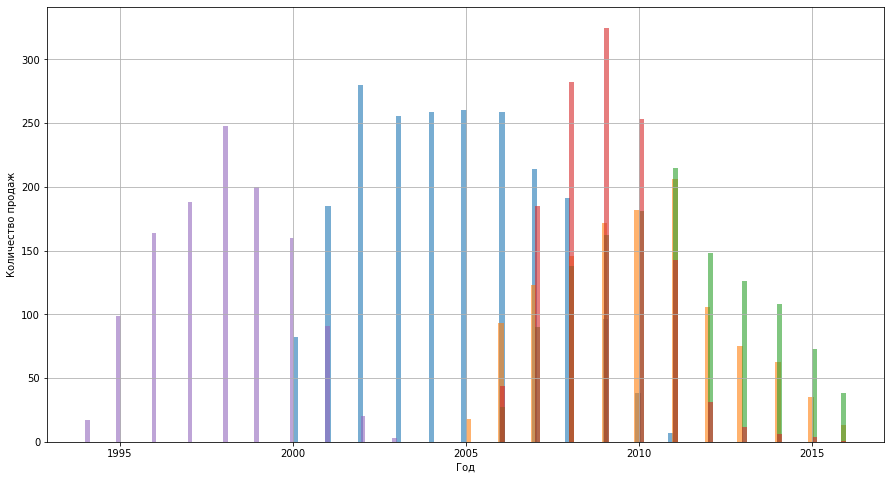

In [162]:
#соберем полученные данные на общий график для наглядности сравнения
top_plarforms = ['PS2','X360','PS3','Wii','PS']

for platform in top_plarforms:
    data[data['platform'] == platform]['year_of_release'].hist(bins = 70, alpha=0.6, figsize = (15,8))
    plt.ylabel('Количество продаж')
    plt.xlabel('Год')

Предположение, сделанное выше подтвердилось, жизненный цикл каждой из рассмотренных платформ составляет 5-7, не более 10 лет  
В среднем наиболее успешный период продаж находится в пределах 7 лет, а т.к. восьмое поколение игровых систем берет свое начало в 2011 году, далее будем рассматривать данные с 2011 по 2016 гг.  

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [163]:
#соберем новый датафрейм, в который войдут данные с 2011 по 2016 гг.
relevant_data = data[data['year_of_release'] >= 2011]

In [164]:
relevant_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [165]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   int32  
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   critic_score     1812 non-null   float64
 9   user_score       2032 non-null   float64
 10  rating           4022 non-null   object 
 11  total_sales      4022 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 392.8+ KB


In [166]:
relevant_data.reset_index(drop=True, inplace=True) #восстановим корректную нумерацию индексов

In [167]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   int32  
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   critic_score     1812 non-null   float64
 9   user_score       2032 non-null   float64
 10  rating           4022 non-null   object 
 11  total_sales      4022 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 361.5+ KB


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [168]:
#соберем сводную таблицу со значениями суммарных продаж по платформам и отсортируем по убыванию
(relevant_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
)

,total_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


Рассмотрим жизненный цикл платформ с наибольшими суммарными продажами в актуальном датафрейме

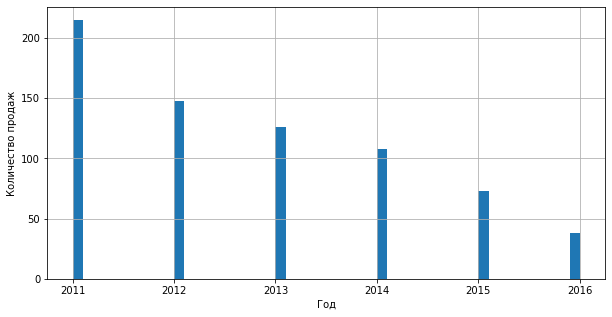

In [169]:
relevant_data[relevant_data['platform'] == 'PS3']['year_of_release'].hist(bins = 50, figsize=(10,5));
plt.ylabel('Количество продаж');
plt.xlabel('Год');

PS3 лидируют по суммарным продажам, но с каждый годом стабильно падают  
Учитывая, что консоль вышла в 2006 году, а в 2013 выпустили PS4, это не удивительно, жизненный цикл PS3 подходит к концу

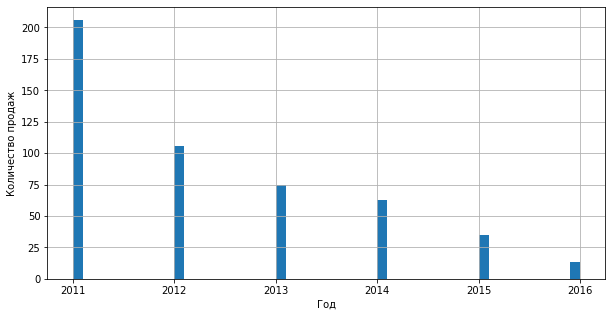

In [170]:
relevant_data[relevant_data['platform'] == 'X360']['year_of_release'].hist(bins = 50, figsize=(10,5));
plt.ylabel('Количество продаж');
plt.xlabel('Год');

X360 на втором месте по суммарным продажам, однако в большей степени за счет первого года, в 2012 по сравнению с предыдущим годом продажи упали в два раза  
Ситуация аналогичная с PS3, X360 вышла в 2005, а в 2013 XOne, плюс жизненный цикл как раз подходит к концу

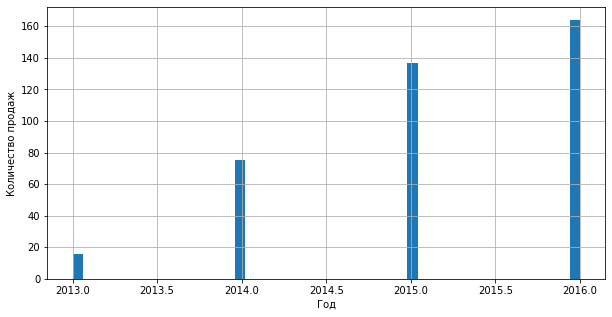

In [171]:
relevant_data[relevant_data['platform'] == 'PS4']['year_of_release'].hist(bins = 50, figsize=(10,5));
plt.ylabel('Количество продаж');
plt.xlabel('Год');

Продажи PS4 растут, причем в 2016 продано в два раза больше, чем в 2014, что в целом не удивительно, ведь в 2016 году вышло немалое количество отличных игр для PS, тот же "Ведьмак 3: Дикая охота" чего стоит  
т.к. PS4 вышла в 2013 году, она еще несколько лет будет актуальна, поэтому относим ее к потенциально прибыльным

In [172]:
relevant_data['year_of_release'].unique()

array([2013, 2011, 2015, 2012, 2014, 2016], dtype=int32)

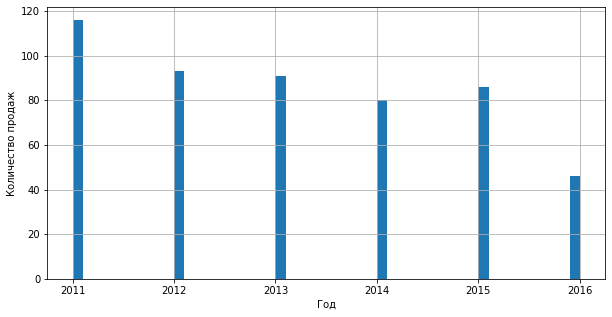

In [173]:
relevant_data[relevant_data['platform'] == '3DS']['year_of_release'].hist(bins = 50, figsize=(10,5));
plt.ylabel('Количество продаж');
plt.xlabel('Год');

Продажи 3DS на пике в 2011 году, в этом году она и вышла, далее небольшой спад, но в целом стабильно, а в 2016 упали почти в два раза по сравнению с предыдущим годом  
В целом, жизненный цикл уже подходит к концу, плюс в 2016 анонсировали Nintendo 3DS, поэтому не будем относить 3DS к потенциально прибыльным

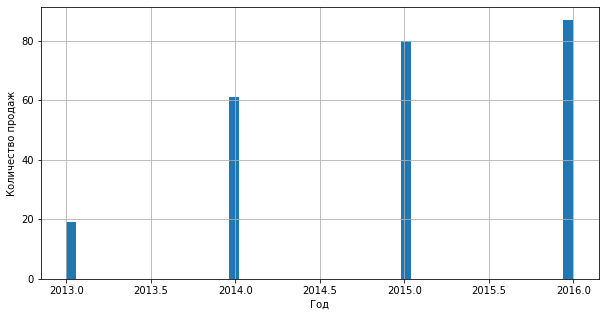

In [174]:
relevant_data[relevant_data['platform'] == 'XOne']['year_of_release'].hist(bins = 50, figsize=(10,5));
plt.ylabel('Количество продаж');
plt.xlabel('Год');

XOne вышла в 2013, продажи стабильно растут, жизненный цикл еще в самом расцвете, поэтому относим ее к потенциально прибильным

**Вывод:**  
Среди топ-5 платформ с наибольшими суммарными продажами за 2011-2016 гг.:  
* В первой тройке лидеров суммарных продаж находятся PS3, X360 и PS4, однако только PS4 можно отнести к потенциально прибыльным
* На 4 и 5 местах находятся 3DS и XOne соответственно, к потенциально прибыльным относится XOne

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [175]:
#посмотрим на характеристики данных
relevant_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,1812.000000,2032.000000,4022.000000
mean,2013.092989,0.206305,0.166532,0.061077,0.051942,71.274283,6.633022,0.485855
std,1.776160,0.570441,0.482864,0.220248,0.155342,13.095847,1.541293,1.219503
min,2011.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,64.000000,5.800000,0.040000
50%,2013.000000,0.040000,0.030000,0.000000,0.010000,74.000000,7.000000,0.130000
75%,2015.000000,0.170000,0.130000,0.050000,0.040000,81.000000,7.800000,0.407500
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


Построим диаграмму размаха по глобальным продажам игр для каждой платформы из нашего топ-5

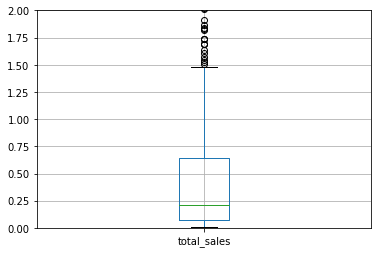

In [176]:
relevant_data[relevant_data['platform'] == 'PS3'].boxplot(column ='total_sales');
plt.ylim(0, 2);

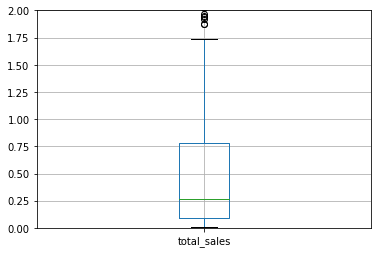

In [177]:
relevant_data[relevant_data['platform'] == 'X360'].boxplot(column ='total_sales');
plt.ylim(0, 2);

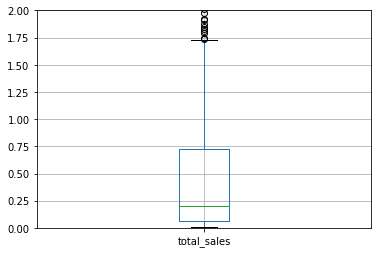

In [178]:
relevant_data[relevant_data['platform'] == 'PS4'].boxplot(column ='total_sales');
plt.ylim(0, 2);

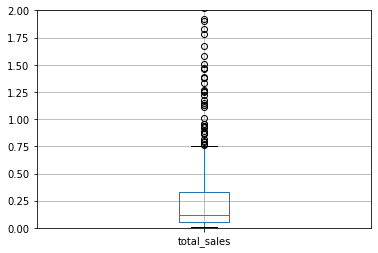

In [179]:
relevant_data[relevant_data['platform'] == '3DS'].boxplot(column ='total_sales');
plt.ylim(0, 2);

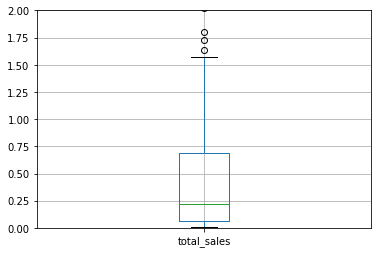

In [180]:
relevant_data[relevant_data['platform'] == 'XOne'].boxplot(column ='total_sales');
plt.ylim(0, 2);

Соберем все эти графики на один для проведения сравнения

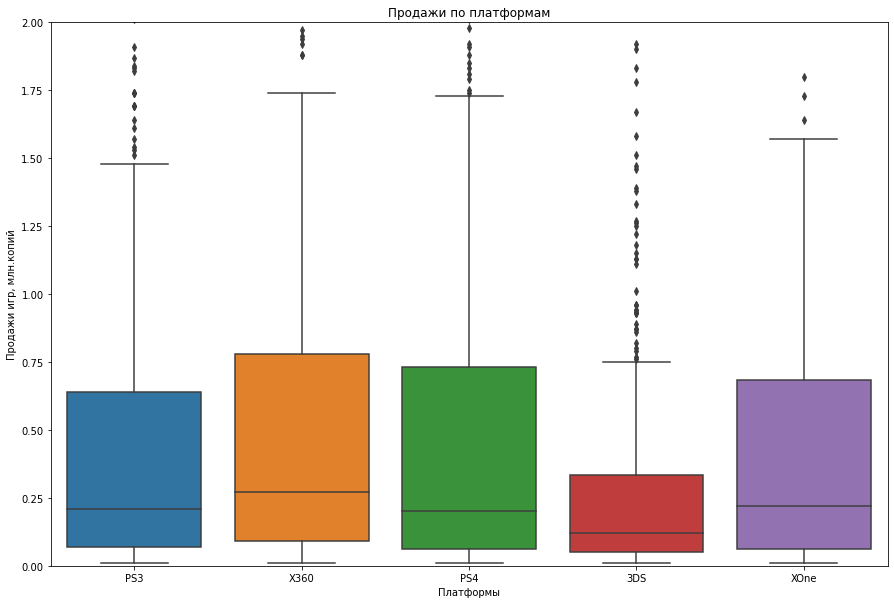

In [181]:
top_plarforms = relevant_data.query("platform in ['PS3','X360','PS4','3DS','XOne']")

plt.figure(figsize=(15,10))
sns.boxplot(data=top_plarforms, x='platform', y='total_sales').\
set(title='Продажи по платформам', xlabel='Платформы', ylabel='Продажи игр, млн.копий', ylim=(0,2))
plt.show()

**Вывод:**  
Сравнение диаграмм размаха 5 платформ показывают, что выбросы присутствуют для всех платформ, больше всего - для 3DS  
Медианы продаж PS3, PS4 и XOne находятся примерно на одном уровне, выше - у X360, а у 3DS - самая низкая  
Верхняя граница межквартильного размаха, т.е. 75% продаж для 3DS ~ в 2 раза ниже остальных, нижняя граница межквартильного размаха, т.е. 25% продаж у всех примерно на одном уровне, у X360 чуть выше

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

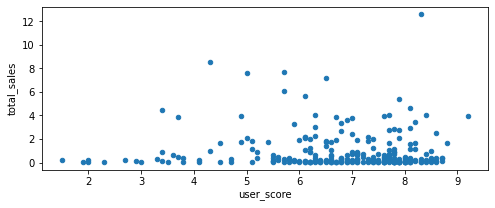

In [182]:
#построим диаграмму рассеяния по отзывам пользователей для PS4
relevant_data[relevant_data['platform'] == 'PS4'].plot(x='user_score',y ='total_sales', kind='scatter', alpha=1, figsize=(8,3));

In [183]:
#посчитаем корреляцию между отзывами пользователей и продажами для PS4
relevant_data[relevant_data['platform'] == 'PS4']['user_score'].corr(relevant_data[relevant_data['platform'] == 'PS4']['total_sales'])

-0.031957110204556376

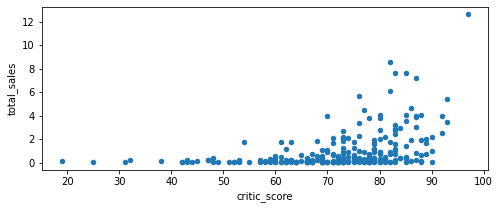

In [184]:
#построим диаграмму рассеяния по отзывам критиков для PS4
relevant_data[relevant_data['platform'] == 'PS4'].plot(x='critic_score',y ='total_sales', kind='scatter', alpha=1, figsize=(8,3));

In [185]:
#посчитаем корреляцию между отзывами критиков и продажами для PS4
relevant_data[relevant_data['platform'] == 'PS4']['critic_score'].corr(relevant_data[relevant_data['platform'] == 'PS4']['total_sales'])

0.40656790206178095

**Вывод:**  
Корреляция между оценками пользователей и объемом продаж почти отсвутствует, однако на диаграмме видно, что более высокие оценки все же вызывают немного больше продаж  
Корреляция между оценками критиков и объемом продаж небольшая, но заметно выше, чем у пользователей, т.е. мнение критиков больше влияет на продажи 

### Соотнесите выводы с продажами игр на других платформах.

Для того, чтобы проверить, верны ли выводы по одной платформе, проведем аналогичные вычисления сразу для всего топ-5 платформ

[0.014089348308019396,
 0.03891817072910255,
 -0.031957110204556376,
 0.22207843643390882,
 -0.06892505328279414]

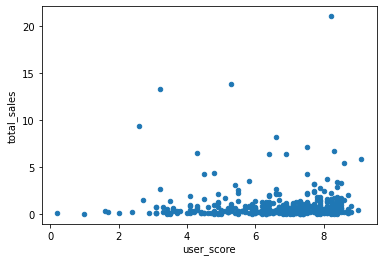

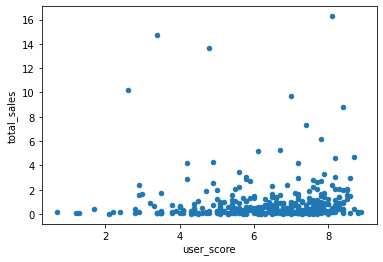

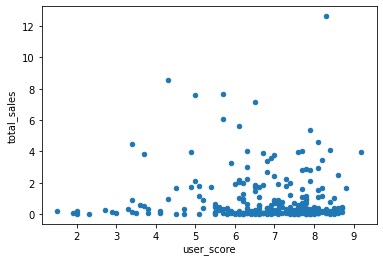

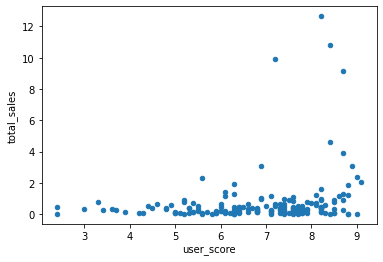

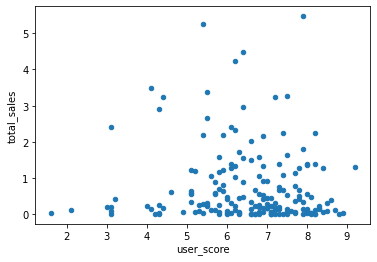

In [186]:
#произведем вычисления для отзывов пользователей
top_platforms = ['PS3','X360','PS4','3DS','XOne'] #создадим список интересующих платформ
user_correlation = [] #сюда запишем получившиеся корреляции после выполнения цикла
#заведем цикл, который выведет на экран все диаграммы рассеяния, посчитает корреляцию и добавит ее в список выше
for platform in top_platforms:
    relevant_data[relevant_data['platform'] == platform].plot(x='user_score',y ='total_sales', kind='scatter', alpha=1) 
    user_correlation.append(relevant_data[relevant_data['platform'] == platform]['user_score'].corr(relevant_data[relevant_data['platform'] == platform]['total_sales']))
user_correlation

[0.38011114718290767,
 0.3912533245484558,
 0.40656790206178095,
 0.3487397305984834,
 0.4169983280084017]

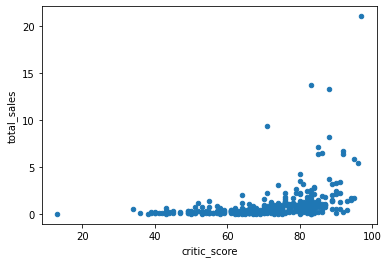

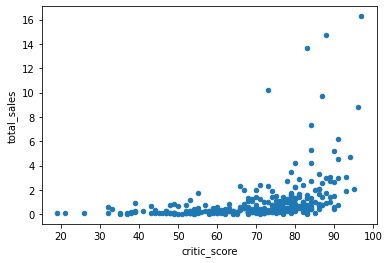

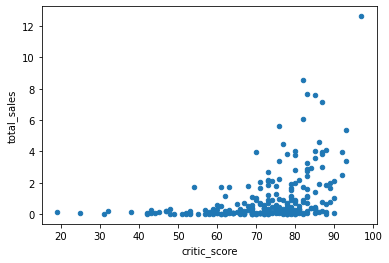

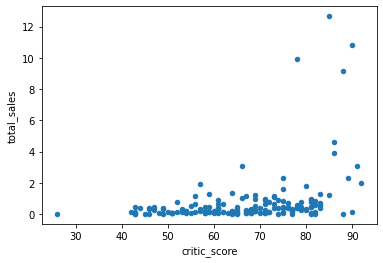

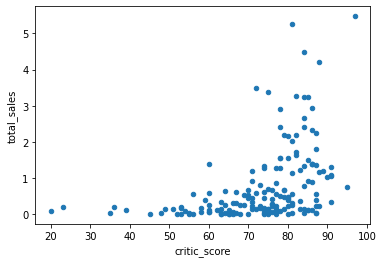

In [187]:
#произведем аналогичные вычисления для отзывов критиков
critic_correlation = [] #сюда запишем получившиеся корреляции после выполнения цикла
#заведем цикл, который выведет на экран все диаграммы рассеяния, посчитает корреляцию и добавит ее в список выше
for platform in top_platforms:
    relevant_data[relevant_data['platform'] == platform].plot(x='critic_score',y ='total_sales', kind='scatter', alpha=1) 
    critic_correlation.append(relevant_data[relevant_data['platform'] == platform]['critic_score'].corr(relevant_data[relevant_data['platform'] == platform]['total_sales']))
critic_correlation

Вычисления по топ-5 платформ подтвердили выводы, сделанные по одной:  
* корреляция между оценками пользователей и объемом продаж почти отсвутствует, но более высокие оценки вызывают немного больше продаж
* мнение критиков больше влияет на продажи, корреляция между оценками критиков и объемом продаж небольшая, но заметно выше, чем у пользователей

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [188]:
#соберем сводную таблицу продаж игр по жанрам и отсортируем ее по убыванию 
(relevant_data
    .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
    .sort_values(by = 'total_sales', ascending = False)
)

,total_sales
genre,
Action,557.80
Shooter,402.91
Role-Playing,245.63
Sports,237.15
Misc,139.42
Platform,88.68
Racing,88.31
Fighting,66.90
Simulation,50.26


По сумме общих продаж лидируют Action и Shooter, причем их продажи в два раза превышают следующие позиции, а начиная с 5 места разница увеличивается до 5 раз и более
Жанры с самыми низкими продажами - Strategy и Puzzle, причем Puzzle по уровню продаж в 55 раз меньше, чем самый продаваемый Action
Проверим соотношение медианных и средних значений

In [189]:
(relevant_data
    .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')
    .sort_values(by = 'total_sales', ascending = False)
)

,total_sales
genre,
Shooter,0.410
Sports,0.200
Platform,0.185
Fighting,0.180
Racing,0.160
Role-Playing,0.150
Action,0.130
Misc,0.130
Simulation,0.110


In [190]:
(relevant_data
    .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean')
    .sort_values(by = 'total_sales', ascending = False)
)

,total_sales
genre,
Shooter,1.224650
Platform,0.726885
Sports,0.609640
Role-Playing,0.528237
Racing,0.490611
Action,0.439559
Fighting,0.420755
Misc,0.371787
Simulation,0.369559


Значения среднего и медианы отличаются, однако рейтинг остается тем же, значит, выбросы примерно одинаковые и по данным значениям можно делать вывод

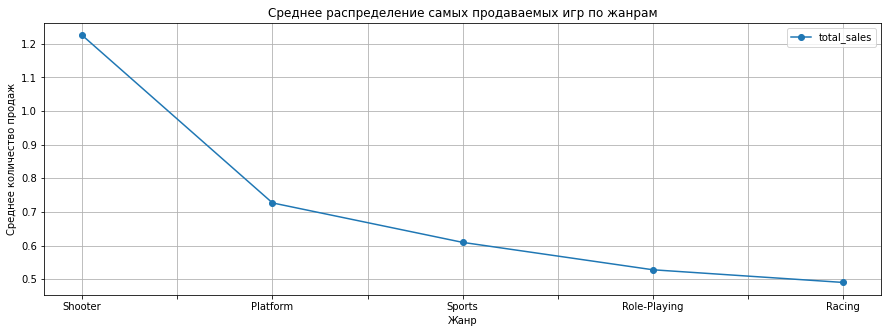

In [191]:
#отразим на графике топ 5 жанров со средними высокими продажами
(relevant_data
    .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean')
    .sort_values(by = 'total_sales', ascending = False)
    .head()
    .plot(grid=True, style='o-', figsize=(15, 5))
)
plt.title('Среднее распределение самых продаваемых игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Среднее количество продаж')
plt.show()

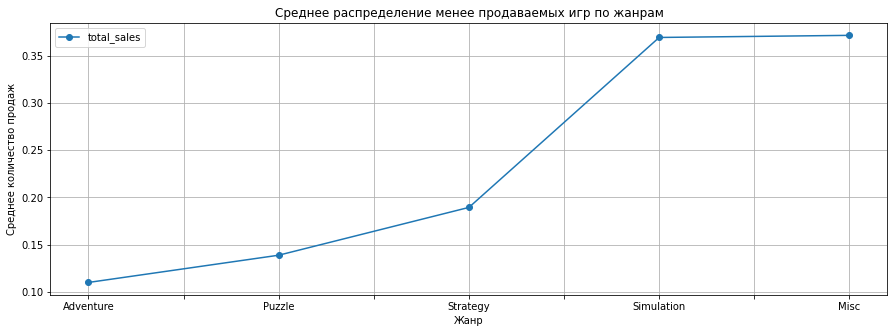

In [192]:
#отразим на графике обратный топ 5 - жанры со средними низкими продажами
(relevant_data
    .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean')
    .sort_values(by = 'total_sales', ascending = True)
    .head()
    .plot(grid=True, style='o-', figsize=(15, 5))
)
plt.title('Среднее распределение менее продаваемых игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Среднее количество продаж')
plt.show()

**Вывод:**  
Несмотря на то, что по общим продажам лидируют игры в жанре Action, на первом месте по средним продажам находятся игры в жанре Shooter, причем среднее значение их продаж более чем в два раза превышает значения по жанрам Platform и Sports, которые занимают 2 и 3 места, соответственно  
Жанры с самыми низкими средними продажами - Adventure и Puzzle  
Между жанрами с высокими и низкими продажами резкая разница, т.е. жанры с высокими и низкими продажами сильно выделяются

## Портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж.


In [193]:
#соберем топ-5 платформ для Северной Америки
(relevant_data
    .groupby('platform').agg('sum')
    .sort_values(by = 'na_sales', ascending = False)
    .head()
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
X360,1002128,226.80,117.10,3.35,33.13,20670.0,2304.7,380.38
PS3,1424994,168.26,163.10,49.39,64.82,24820.0,2757.4,445.57
PS4,789937,108.74,141.09,15.96,48.35,18167.0,1734.3,314.14
XOne,497693,93.12,51.59,0.34,14.27,12392.0,1186.9,159.32
3DS,1030721,82.65,61.27,100.62,13.27,11148.0,1171.7,257.81


Топ-5 по продажам в Северной Америке:
1. X360
2. PS3
3. PS4
4. XOne
5. 3DS

In [194]:
#топ-5 платформ для Европы
(relevant_data
    .groupby('platform').agg('sum')
    .sort_values(by = 'eu_sales', ascending = False)
    .head()
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
PS3,1424994,168.26,163.10,49.39,64.82,24820.0,2757.4,445.57
PS4,789937,108.74,141.09,15.96,48.35,18167.0,1734.3,314.14
X360,1002128,226.80,117.10,3.35,33.13,20670.0,2304.7,380.38
3DS,1030721,82.65,61.27,100.62,13.27,11148.0,1171.7,257.81
PC,783027,29.88,56.70,0.00,11.10,21632.0,1980.7,97.68


Топ-5 по продажам в Европе:
1. PS3
2. PS4
3. X360
4. 3DS
5. PC

In [195]:
#топ-5 платформ для Японии
(relevant_data
    .groupby('platform').agg('sum')
    .sort_values(by = 'jp_sales', ascending = False)
    .head()
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
3DS,1030721,82.65,61.27,100.62,13.27,11148.0,1171.7,257.81
PS3,1424994,168.26,163.10,49.39,64.82,24820.0,2757.4,445.57
PSP,627688,2.19,1.77,24.04,1.01,984.0,107.6,29.01
PSV,864063,12.47,13.07,21.84,6.43,8417.0,1041.5,53.81
PS4,789937,108.74,141.09,15.96,48.35,18167.0,1734.3,314.14


Топ-5 по продажам в Японии:
1. 3DS
2. PS3
3. PSP
4. PSV
5. PS4

Для сравнения долей продаж от общих отсортируем в этом же ключе платформы по общим продажам и сохраним в переменную

In [196]:
total_sales_platforms = (relevant_data
                    .groupby('platform').agg('sum')
                    .sort_values(by = 'total_sales', ascending = False)
                )
total_sales_platforms.head()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
PS3,1424994,168.26,163.10,49.39,64.82,24820.0,2757.4,445.57
X360,1002128,226.80,117.10,3.35,33.13,20670.0,2304.7,380.38
PS4,789937,108.74,141.09,15.96,48.35,18167.0,1734.3,314.14
3DS,1030721,82.65,61.27,100.62,13.27,11148.0,1171.7,257.81
XOne,497693,93.12,51.59,0.34,14.27,12392.0,1186.9,159.32


na_sales


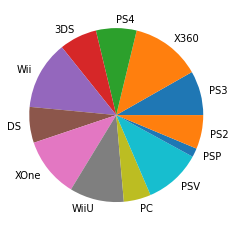

eu_sales


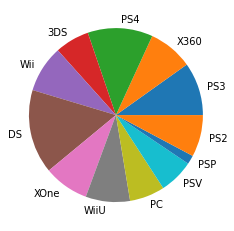

jp_sales


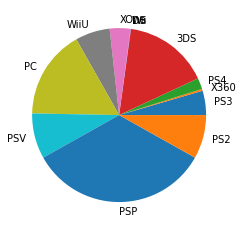

In [197]:
regions = ['na_sales','eu_sales', 'jp_sales'] #создадим список регионов

platforms = list(relevant_data['platform'].unique()) #создадим список платформ

#создадим цикл, который посчитает долю продаж каждого региона и построит диаграмму-пирог
for region in regions:
    segment = total_sales_platforms[region]/total_sales_platforms['total_sales']
    print(region)
    plt.pie(segment, labels=platforms)
    plt.show()

Если у Америки и Европы распределение продаж платформ немного отличается по долям, но в целом весьма схоже, то распределние долей в Японии сильно отличается от обоих, например: почти 1/3 занимает PSP, а в Америке и Европе она на последнем месте  
Судя по статистике, в отличии от американцев и европецев, японцы предпочитают портативные консоли

### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясните разницу.


In [198]:
#соберем топ-5 жанров для Северной Америки
(relevant_data
    .groupby('genre').agg('sum')
    .sort_values(by = 'na_sales', ascending = False)
    .head()
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
Action,2554984,230.92,199.12,63.62,64.14,40471.0,4499.2,557.80
Shooter,662297,194.43,148.02,11.92,48.54,18120.0,1744.9,402.91
Sports,783077,108.70,88.48,11.09,28.88,13609.0,1390.1,237.15
Role-Playing,936184,83.78,62.30,79.87,19.68,14571.0,1524.8,245.63
Misc,754688,69.69,39.72,17.60,12.41,6663.0,683.8,139.42


Топ-5 жанров в Северной Америке:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

In [199]:
#соберем топ-5 жанров для Европы
(relevant_data
    .groupby('genre').agg('sum')
    .sort_values(by = 'eu_sales', ascending = False)
    .head()
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
Action,2554984,230.92,199.12,63.62,64.14,40471.0,4499.2,557.80
Shooter,662297,194.43,148.02,11.92,48.54,18120.0,1744.9,402.91
Sports,783077,108.70,88.48,11.09,28.88,13609.0,1390.1,237.15
Role-Playing,936184,83.78,62.30,79.87,19.68,14571.0,1524.8,245.63
Racing,362315,31.98,40.58,5.64,10.11,7943.0,727.2,88.31


Топ-5 жанров в Европе:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

In [200]:
#соберем топ-5 жанров для Японии
(relevant_data
    .groupby('genre').agg('sum')
    .sort_values(by = 'jp_sales', ascending = False)
    .head()
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
Role-Playing,936184,83.78,62.30,79.87,19.68,14571.0,1524.8,245.63
Action,2554984,230.92,199.12,63.62,64.14,40471.0,4499.2,557.80
Misc,754688,69.69,39.72,17.60,12.41,6663.0,683.8,139.42
Fighting,320051,31.63,16.24,12.38,6.65,7052.0,728.2,66.90
Platform,245582,38.28,30.07,12.13,8.20,6146.0,627.0,88.68


Топ-5 жанров в Японии:
1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Platform

Топ-5 самых популярных жанров в Северной Америке и Европе практически идентичны: совпадают по 4 пунктам  
Как и в случае с самыми популярными платформами, данные по Японии заметно отличаются  
У американцев и европейцев на первом месте игры в жанре экшн, японцы отдают предпочтение ролевым

### Определите для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Согласно рейтингу ESRB аббревиатуры обозначают следующее:  
* M - Для взрослых
* E - Для всех
* E10+ - Для всех от 10 лет и старше
* T - Подросткам
* RP - Рейтинг ожидается
* EC - Для детей младшего возраста

In [201]:
#соберем топ-5 по рейтингу ESRB для Северной Америки
(relevant_data
    .groupby('rating').agg('sum')
    .sort_values(by = 'na_sales', ascending = False)
    .head(10)
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
rating,,,,,,,,
M,1252201,308.45,250.26,26.14,81.96,41283.0,4111.6,666.81
E,1243933,170.17,141.73,36.68,40.86,26797.0,2689.3,389.44
unknown,3438524,123.69,116.61,138.21,33.97,3831.0,445.7,412.48
E10+,917910,117.72,78.00,11.23,23.91,22456.0,2387.4,230.86
T,1240070,109.31,83.16,33.39,28.17,34719.0,3837.5,254.03
EC,2011,0.42,0.00,0.00,0.03,0.0,0.0,0.45
RP,2011,0.00,0.03,0.00,0.01,63.0,6.8,0.04


В Северной Америке самыми продаваемыми являются игры с рейтингом для взрослых, на втором месте - для всех  
В целом, чем уже возрастная группа, тем меньше рейтинг

In [202]:
#соберем топ-5 по рейтингу ESRB для Европы
(relevant_data
    .groupby('rating').agg('sum')
    .sort_values(by = 'eu_sales', ascending = False)
    .head(10)
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
rating,,,,,,,,
M,1252201,308.45,250.26,26.14,81.96,41283.0,4111.6,666.81
E,1243933,170.17,141.73,36.68,40.86,26797.0,2689.3,389.44
unknown,3438524,123.69,116.61,138.21,33.97,3831.0,445.7,412.48
T,1240070,109.31,83.16,33.39,28.17,34719.0,3837.5,254.03
E10+,917910,117.72,78.00,11.23,23.91,22456.0,2387.4,230.86
RP,2011,0.00,0.03,0.00,0.01,63.0,6.8,0.04
EC,2011,0.42,0.00,0.00,0.03,0.0,0.0,0.45


В Европе аналогичная ситуация как и в Северной Америке: также самыми продаваемыми являются игры с рейтингом для взрослых, на втором месте - для всех, чем уже возрастная группа, тем меньше рейтинг

In [203]:
#соберем топ-5 по рейтингу ESRB для Японии
(relevant_data
    .groupby('rating').agg('sum')
    .sort_values(by = 'jp_sales', ascending = False)
    .head(10)
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
rating,,,,,,,,
unknown,3438524,123.69,116.61,138.21,33.97,3831.0,445.7,412.48
E,1243933,170.17,141.73,36.68,40.86,26797.0,2689.3,389.44
T,1240070,109.31,83.16,33.39,28.17,34719.0,3837.5,254.03
M,1252201,308.45,250.26,26.14,81.96,41283.0,4111.6,666.81
E10+,917910,117.72,78.00,11.23,23.91,22456.0,2387.4,230.86
EC,2011,0.42,0.00,0.00,0.03,0.0,0.0,0.45
RP,2011,0.00,0.03,0.00,0.01,63.0,6.8,0.04


В Японии преобладают продажи игр для всех, но в целом также наблюдается тенденция снижения рейтинга при сужении группы

## Проверка гипотез  

Задайте самостоятельно пороговое значение alpha.  
Поясните:  
Как вы сформулировали нулевую и альтернативную гипотезы;  
Какой критерий применили для проверки гипотез и почему.  


### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:  
* H0 - пользовательские рейтинги платформ Xbox One и PC одинаковые
* H1 - пользовательские рейтинги платформ Xbox One и PC разные

Обозначим переменные, в которых будут собраны данные отдельно по Xbox One и PC:

In [204]:
#создадим переменную, в которой будет информация только по XOne + добавим условие по оценке пользователей >=0, чтобы не учитывались NaN
xbox_pl = relevant_data[(relevant_data['platform'] == 'XOne') & (relevant_data['user_score'] >= 0)]
xbox_pl.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
44,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
47,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
59,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
70,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
92,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [205]:
#произведем аналогичную операцию для PC
pc_pl = relevant_data[(relevant_data['platform'] == 'PC') & (relevant_data['user_score'] >= 0)]
pc_pl.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
52,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
82,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,1.16,2.12,0.0,0.60,94.0,8.1,M,3.88
115,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
121,Star Wars: The Old Republic,PC,2011,Role-Playing,1.58,1.01,0.0,0.38,85.0,5.9,T,2.97
134,Battlefield 3,PC,2011,Shooter,0.89,1.43,0.0,0.46,89.0,7.5,M,2.78


In [206]:
alpha = .05

results = st.ttest_ind(
    xbox_pl['user_score'], 
    pc_pl['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


Результат проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам показал, что мы **не отвергаем** гипотезу H0: пользовательские рейтинги платформ Xbox One и PC одинаковые

### Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезы:  
* Н0 - средние пользовательские рейтинги жанров Action и Sports одинаковые 
* Н1 - средние пользовательские рейтинги жанров Action и Sports разные

In [207]:
action_g = relevant_data[(relevant_data['genre'] == 'Action') & (relevant_data['user_score'] >= 0)]
sports_g = relevant_data[(relevant_data['genre'] == 'Sports') & (relevant_data['user_score'] >= 0)]

In [208]:
alpha = .05

results = st.ttest_ind(
    action_g['user_score'], 
    sports_g['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


Результат проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам показал, что мы **отвергаем** гипотезу H0: средние пользовательские рейтинги жанров Action и Sports одинаковые

## Общий вывод

* Из данных за 1980-2016 гг для прогнозирования прибыльности на 2017 стоит рассматривать тенденции не более последних 7 лет  
* В получившейся выборке потенциально прибыльным являются PS4 и XOne  
* Поскольку жизненный цикл платформы в среднем составляет около 7 лет, стоит рассматривать как прибыльные платформы, существующие на рынке около 3-4 лет и меньше  
* Корреляция между оценками пользователей и объемом продаж (около 0,035 в среднем) сильно ниже, чем между оценками критиков и объемом продаж (около 0,389 в среднем), т.е. стоит учитывать мнение критиков при прогнозировании   
* Жанры с самыми низкими продажами - Strategy и Puzzle, причем Puzzle по уровню продаж в 55 раз меньше, чем самый продаваемый Action  
* Несмотря на то, что по общим продажам лидируют игры в жанре Action, на первом месте по средним продажам находятся игры в жанре Shooter, причем среднее значение их продаж более чем в два раза превышает значения по жанрам Platform и Sports, которые занимают 2 и 3 места, соответственно
* Жанры с самыми низкими средними продажами - Adventure и Puzzle
* Топ-5 популярных платформ в Северной Америке и Европе почти одинаковы, а статистика в Японии сильно отличается, аналогичная ситуация и по жанрам, соответственно, статистику для данных регионов стоит рассматривать отдельно  
* По рейтингу ESRB чем уже возрастная группа, тем ниже рейтинг  
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные  
